# Getting Sttarted
This notebook is an introduction to time series modelling. It is intended to start from the very basics and build up to more advanced topics. The notebook is divided into the following sections:

1. Introduction
2. Time Series Basics
3. Time Series Models
4. Time Series Forecasting
5. Time Series Analysis
6. Singular Spectrum Analysis
7. Time Series Forecasting with ARIMA
8. Time Series Forecasting with LSTM
9. Time Series Forecasting with Facebook Prophet


# Some Tips and Tricks on how to approach the problem
1. Start with the basics
2. Understand the data
3. Understand the problem
4. Set the goal of the project (what do you want to achieve) very clearly and make sure that you are able to measure it (e.g. accuracy, precision, recall, etc.)

    This step is very important because it will help you to decide which model to use and how to evaluate it. 

# Data Sources
Some of the popular data sources for getting started with time series modelling are:

Kaggle time series datasets: https://www.kaggle.com/datasets?fileType=csv&search=time+series

UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php?format=&task=ts&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table

# References
1. https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
3. https://www.kaggle.com/robikscube/tutorial-time-series-forecasting-with-prophet


# Criterias for performance evaluation of time series models
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. Mean Absolute Percentage Error (MAPE)
5. Mean Absolute Scaled Error (MASE)
6. Mean Percentage Error (MPE)
7. Mean Absolute Directional Accuracy (MADA)
8. Mean Directional Accuracy (MDA)
9. Mean Absolute Deviation (MAD)
10. Mean Deviation (MD)
11. Mean Squared Log Error (MSLE)
12. Median Absolute Error (MdAE)
13. Median Squared Error (MdSE)
14. Median Absolute Percentage Error (MdAPE)
15. Median Absolute Scaled Error (MdASE)
16. Median Percentage Error (MdPE)
17. Median Absolute Deviation (MdAD)
18. Median Deviation (MdD)
19. Median Squared Log Error (MdSLE)
20. Mean Bias Error (MBE)
21. Mean Squared Bias Error (MSBE)
22. Median Bias Error (MdBE)
23. Median Squared Bias Error (MdSBE)

## Criteria for performance evaluation of time series models with output between 0 and 1 (probability)
1. Log Loss
2. Brier Score
3. Brier Skill Score
4. Continuous Ranked Probability Score (CRPS)
5. Continuous Ranked Probability Score Skill Score (CRPSS)
6. Continuous Ranked Probability Score Interval Score (CRPSIS)
7. Continuous Ranked Probability Score Interval Score Skill Score (CRPSISS)
8. Continuous Ranked Probability Score Interval Score (CRPSIS)



In [2]:
# import Kaggle time series data
# https://www.kaggle.com/c/web-traffic-time-series-forecasting/data
# https://www.kaggle.com/c/web-traffic-time-series-forecasting/discussion/44629

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# Univariate Time Series: Daily Minimum Temperatures in Melbourne
###  We set the objective here to predict the tempreture for the next year (365 days) based on the previous 10 years of data (3650 days)

In [3]:
# We use some data from the Time Series Data Library 
# DAily Temperatures in Melbourne, Australia, 1981-1990
data_link = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(data_link, parse_dates=['Date'], index_col='Date')


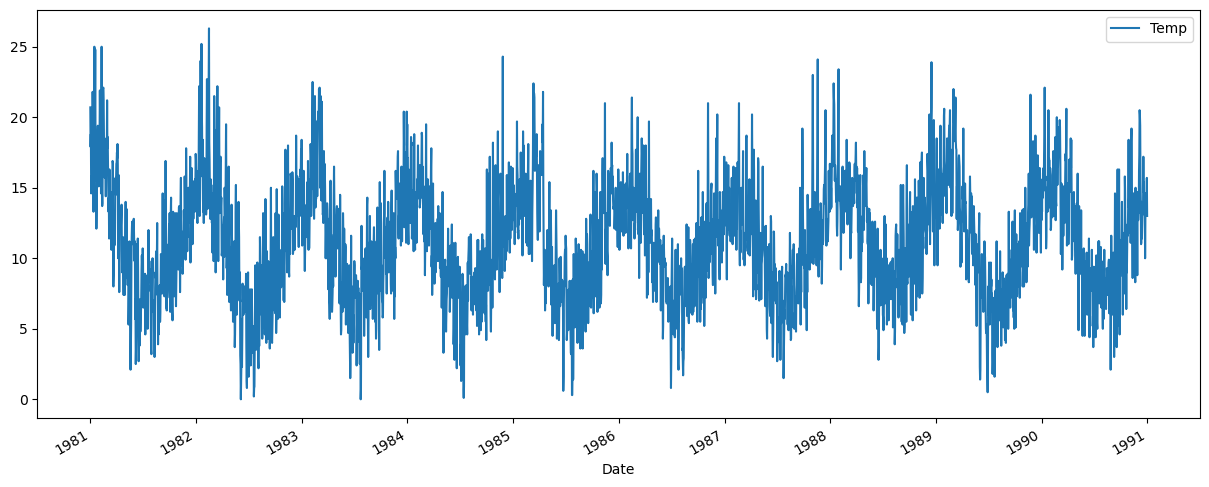

In [4]:
# Lets get started with some basic EDA
# We will start with a simple line plot of the data to get a sense of the behavior of the data over time
df.plot(figsize=(15, 6))
plt.show()


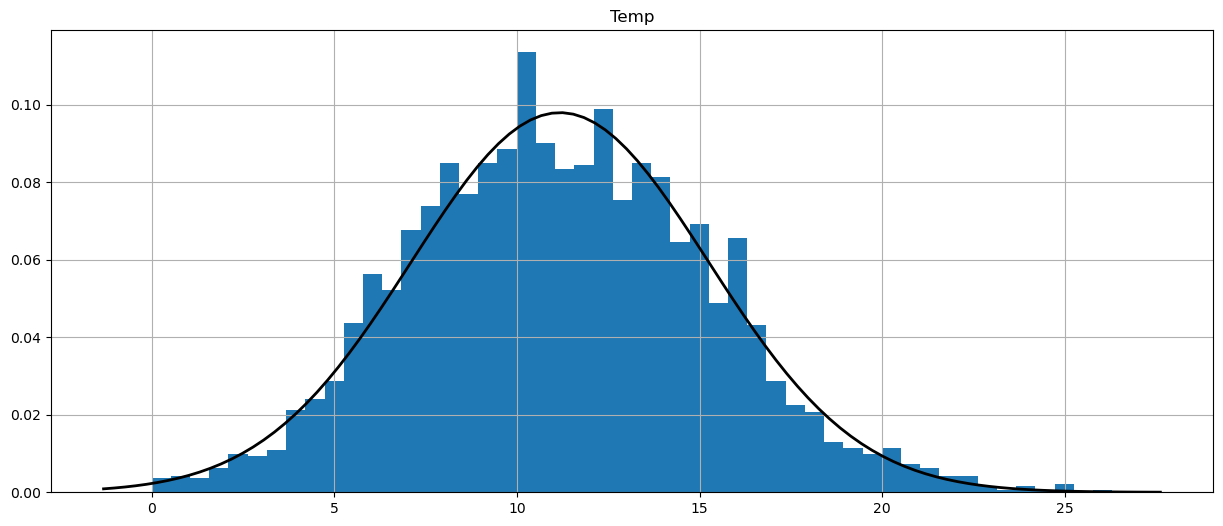

In [6]:
# We can also look at the distribution of the data
# We can see that the data is not normally distributed
# We can also see that there is a clear seasonality to the data
import scipy.stats as stats

df.hist(figsize=(15, 6), bins=50, density=True)
# plot a normal distribution with the same mean and std 
mu, sigma = df.mean(), df.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.show()


In [8]:
# test foor normality using different tests 
alpha = 0.01
def interpret_test(stat, p):
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        # statictic for acceptance region
        statistic_at_alpha = stats.norm.ppf(1 - alpha)
        print('Statistic: %.3f, Statistic at alpha: %.3f' % (stat, statistic_at_alpha))
    else:
        print('Sample does not look Gaussian (reject H0)')

# Anderson-Darling Test
result = stats.anderson(df['Temp'])
print('Anderson-Darling Test')
interpret_test(result.statistic, result.critical_values[2])
print('')
# D'Agostino's K^2 Test
stat, p = stats.normaltest(df['Temp'])
print("D'Agostino's K^2 Test")
interpret_test(stat, p)
print('')
# Shapiro-Wilk Test
stat, p = stats.shapiro(df['Temp'])
print("Shapiro-Wilk Test")
interpret_test(stat, p)
print('')
# Kolmogorov-Smirnov Test
stat, p = stats.kstest(df['Temp'], 'norm')
print("Kolmogorov-Smirnov Test")
interpret_test(stat, p)
print('')
# Jarque-Bera Test
stat, p = stats.jarque_bera(df['Temp'])
print("Jarque-Bera Test")
interpret_test(stat, p)
print('')


Anderson-Darling Test
Sample looks Gaussian (fail to reject H0)
Statistic: 1.932, Statistic at alpha: 2.326

D'Agostino's K^2 Test
Sample does not look Gaussian (reject H0)

Shapiro-Wilk Test
Sample does not look Gaussian (reject H0)

Kolmogorov-Smirnov Test
Sample does not look Gaussian (reject H0)

Jarque-Bera Test
Sample does not look Gaussian (reject H0)



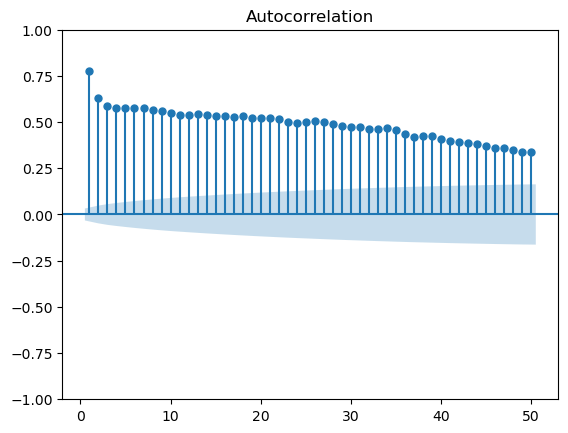

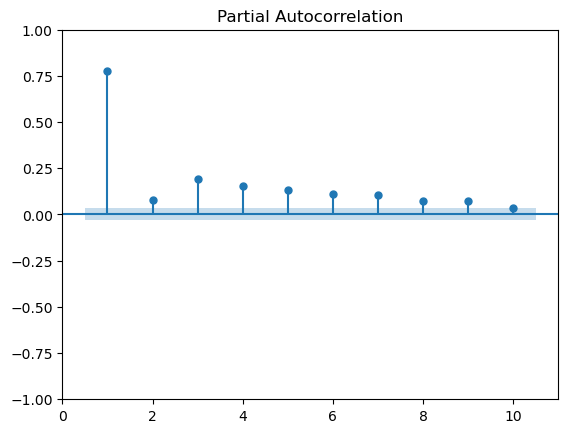

In [23]:
# We can also look at the autocorrelation of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df, lags=50, zero=False)
plot_pacf(df, lags=10, zero=False)
plt.show()

# Basic Time Series Models 
1. Naive
2. Moving Average
3. Simple Exponential Smoothing
4. Holt's Linear Trend Model
5. Holt-Winters Method


In [50]:
# Hyper Parameters
# Let's define some hyper parameters for the models and our objectives here 
# We would like to predict the last 365 days of data 
predSpan = 365

## 1. Naive Model 
This is the simplest model that assumes that the next expected point is equal to the last observed point. This model is useful as a baseline for comparison with other more complex models. It is also useful for understanding the performance of more complex models on your problem. The Naive model is not appropriate for all time series forecasting problems, but it is a good starting point. The Naive model is appropriate for univariate time series without trend or seasonal components. 

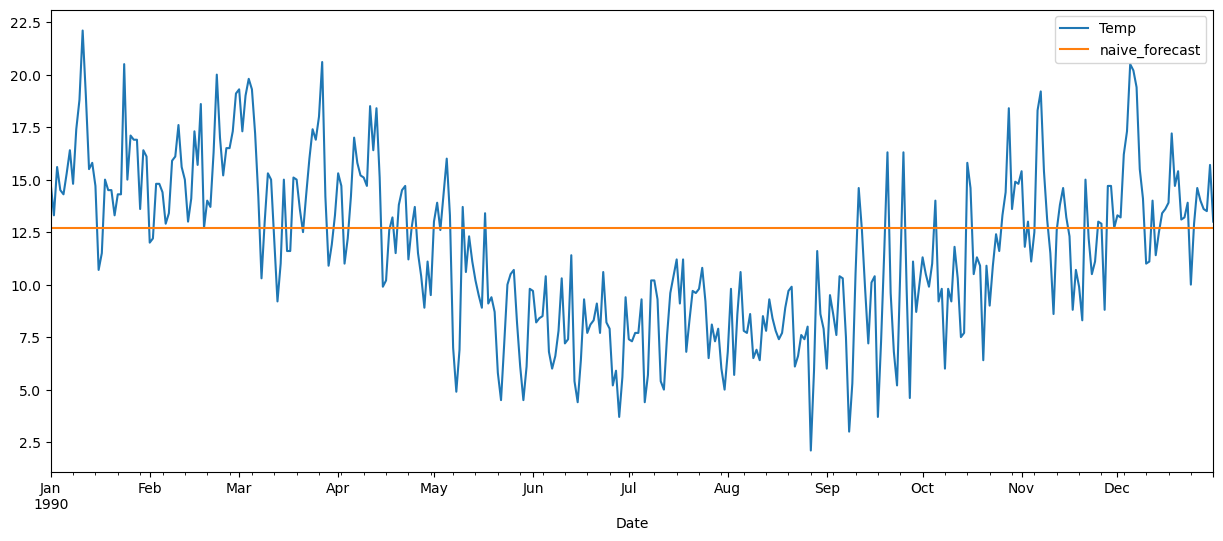

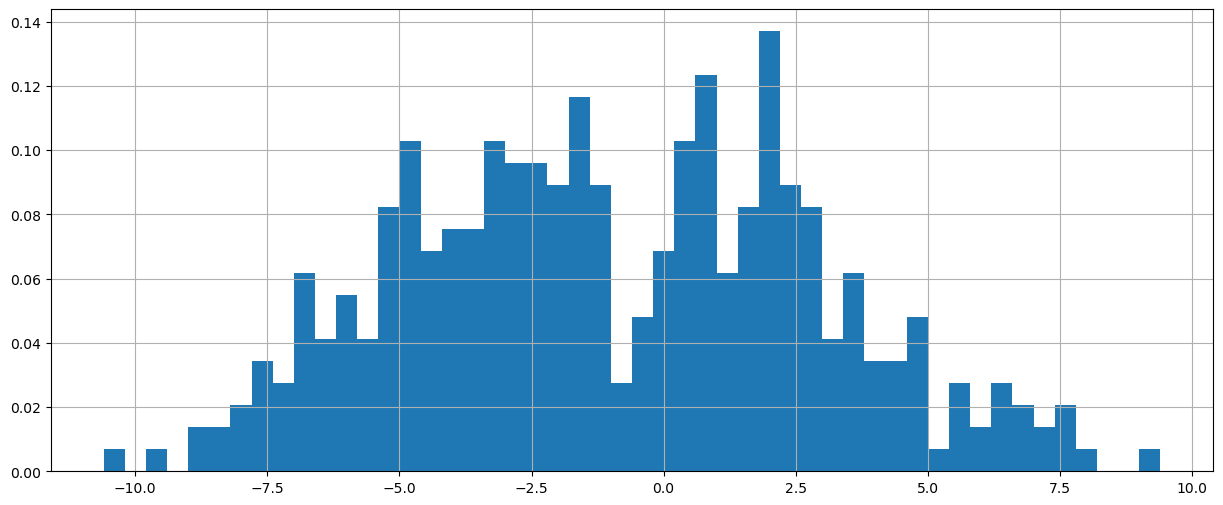

RMSE: 3.992


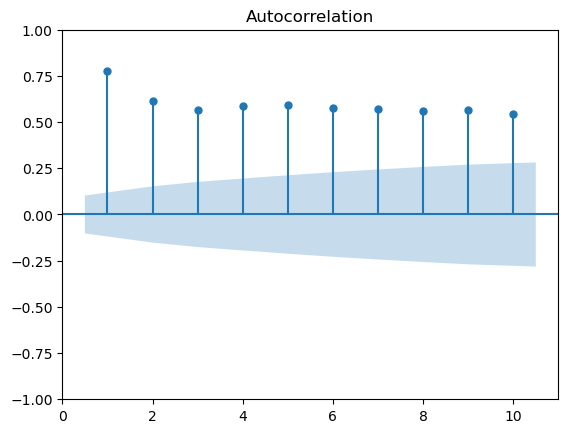

In [51]:
# Lets start building some basic models to forecast the data 
# Naive Forecast 
def naive_forecast(df, n_test):
    # split into train and test
    train, test = df[:-n_test], df[-n_test:]
    # make prediction
    predictions = test.copy()
    predictions['naive_forecast'] = train['Temp'].iloc[-1]
    
    return predictions

# plot the naive forecast and the residuals 
predictions = naive_forecast(df, n_test=predSpan)
predictions[['Temp', 'naive_forecast']].plot(figsize=(15, 6))
plt.show()
# plot residuals distribution 
residuals = predictions['Temp'] - predictions['naive_forecast']
residuals.hist(figsize=(15, 6), bins=50, density=True)
plt.show()
# plot residuals acf 
plot_acf(residuals, lags=10, zero=False)
# calculate the RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(predictions['Temp'], predictions['naive_forecast']))

print('RMSE: %.3f' % rmse)



## 2. Moving Average Model
The moving average model is a type of naive model that uses the average of observations over a previous period. The moving average model is appropriate for univariate time series without trend or seasonal components. It is also appropriate for univariate time series with trend and/or seasonal components, but a better approach may be to model the trend and/or seasonality and model the residuals with a moving average model. It has a single parameter, the number of lag observations to use in the prediction, often called the window size or lag. The moving average model is a linear model. The model can be extended to support multiple input time steps by adding additional lag. 

### Disadvantages of Moving Average Model
1. The model is not able to capture the trend and seasonality in the data.
2. The model is not able to capture the long term dependencies in the data.
3. The predictions are not accurate when the number of test data points is large.




In [40]:
moving_avg_window = 400

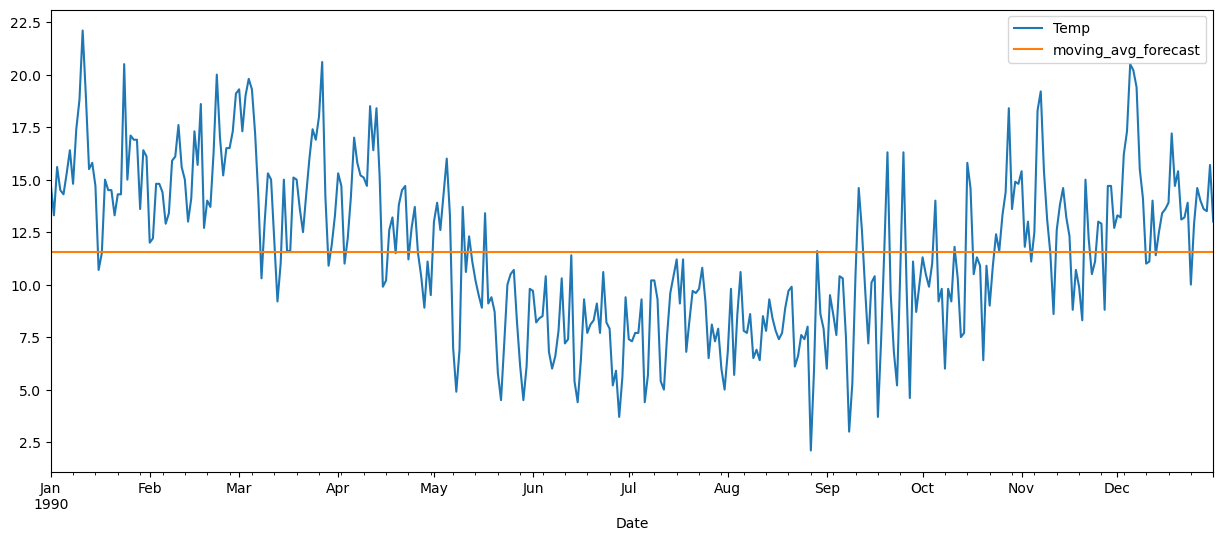

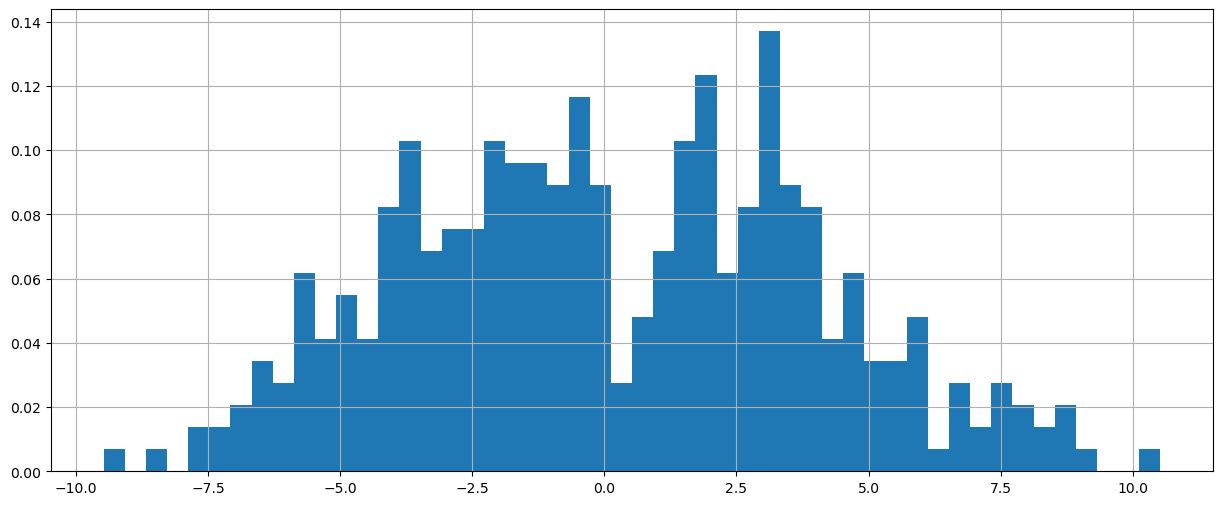

RMSE: 3.857


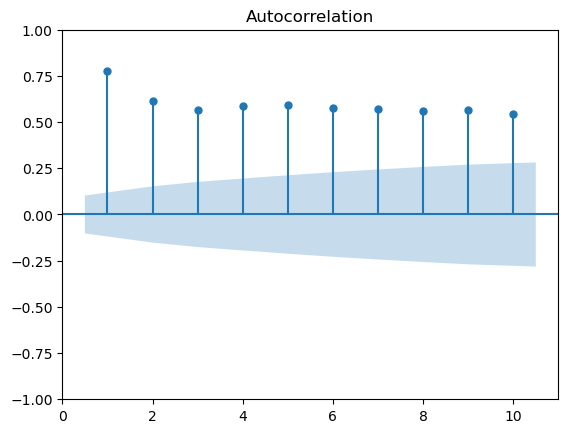

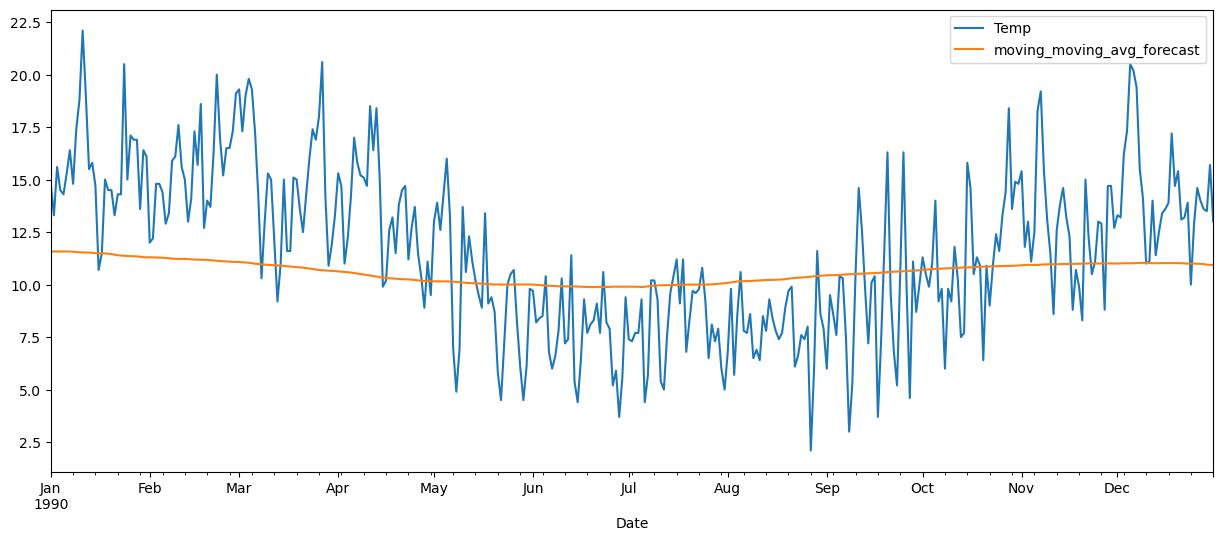

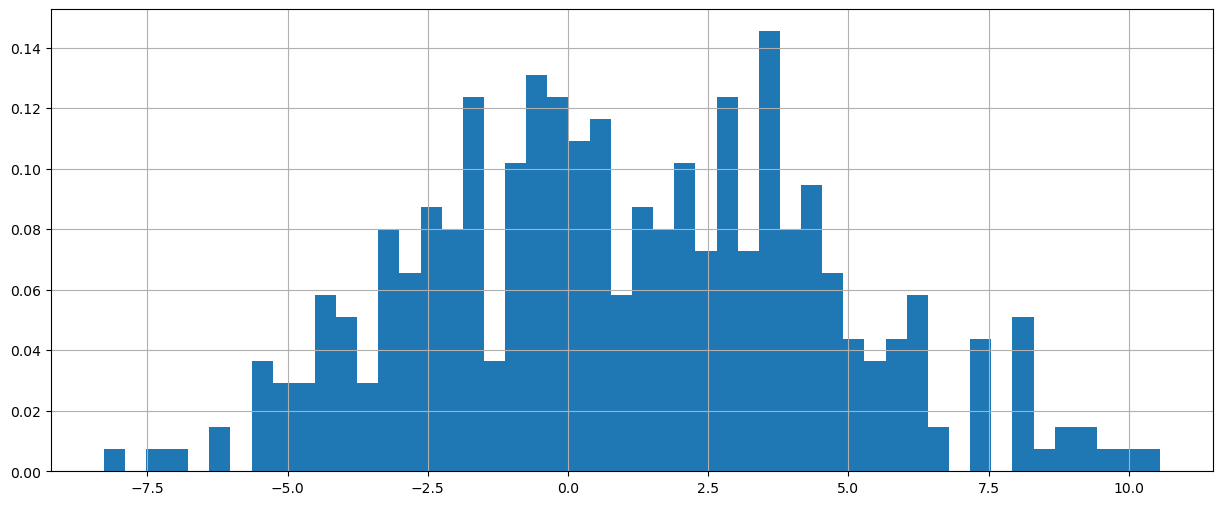

RMSE: 3.700
RMSE: 3.857
RMSE: 3.700


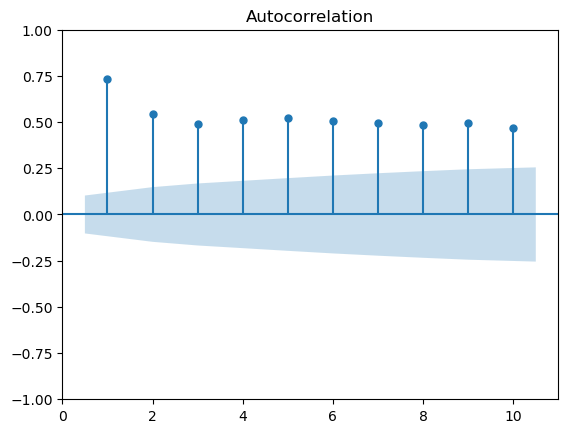

In [56]:
def movin_avg_forecast(df, n_test, window):
    # split into train and test
    train, test = df[:-n_test], df[-n_test:]
    # use the last window values to predict the next value 
    predictions = test.copy()
    predictions['moving_avg_forecast'] = train['Temp'][len(train) - window:].mean()
    return predictions

def moving_moving_avg_forecast(df, n_test, window):
    # use the predictions in estimating the next prediction of the test data 
    predictions = df.copy()
    predictions['moving_moving_avg_forecast'] = df["Temp"]
    for i in range(len(df) - n_test, len(df)):
        predictions['moving_moving_avg_forecast'][i] = predictions['moving_moving_avg_forecast'][i - window:i].mean()
    
    return predictions[-n_test:]

def plot_predictions_residuals_acf(pred_func, pred_colunm_name, *args, **kwargs):
    predictions = pred_func(*args, **kwargs)
    predictions[['Temp', pred_colunm_name]].plot(figsize=(15, 6))
    plt.show()
    # plot residuals distribution 
    residuals = predictions['Temp'] - predictions[pred_colunm_name]
    residuals.hist(figsize=(15, 6), bins=50, density=True)
    plt.show()
    # plot residuals acf 
    plot_acf(residuals, lags=10, zero=False)
    # calculate the RMSE
    rmse = sqrt(mean_squared_error(predictions['Temp'], predictions[pred_colunm_name]))
    print('RMSE: %.3f' % rmse)
    return predictions

# plot the moving average forecast and the residuals
predictions = plot_predictions_residuals_acf(movin_avg_forecast, 'moving_avg_forecast', df, 
                                             n_test=predSpan, window=moving_avg_window)

# plot the moving moving average forecast and the residuals
predictions2 = plot_predictions_residuals_acf(moving_moving_avg_forecast, 'moving_moving_avg_forecast', df,
                                                n_test=predSpan, window=moving_avg_window)

# print the RMSE 
print('RMSE: %.3f' % sqrt(mean_squared_error(predictions['Temp'], predictions['moving_avg_forecast'])))
print('RMSE: %.3f' % sqrt(mean_squared_error(predictions2['Temp'], predictions2['moving_moving_avg_forecast'])))


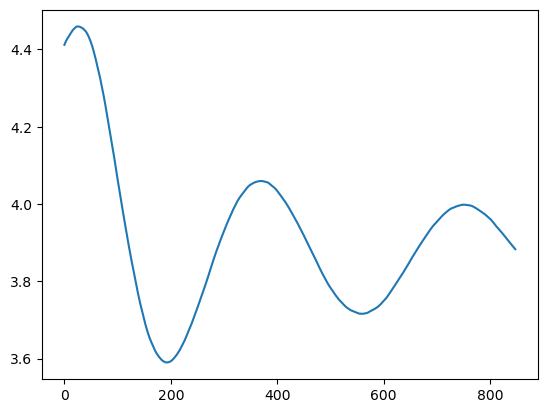

In [58]:
# predict the test data using using the moving average with a windown in range [2, 3*365]
# and calculate the RMSE for each window and plot the results
rmse_results = []
for window in range(250, 3*366):
    # rmse of the moving moving average forecast
    predictions2 = moving_moving_avg_forecast(df, n_test=predSpan, window=window)
    rmse = sqrt(mean_squared_error(predictions2['Temp'], predictions2['moving_moving_avg_forecast']))
    rmse_results.append(rmse)

# plot the RMSE results
plt.plot(range(250, 3*366), rmse_results)

# 3. Simple Exponential Smoothing
The Simple Exponential Smoothing (SES) method is a time series forecasting method for univariate data without a trend or seasonal component. It is a weighted moving average method where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations. The method is suitable for univariate time series without trend and seasonal components. The Simple Exponential Smoothing method is a linear model. The model can be extended to support multiple input time steps by adding additional lag. 

The parameters of the model are the smoothing parameter, alpha, and the initial level, l0. The smoothing parameter, alpha, controls how quickly the influence of the observations at prior time steps decay. The initial level, l0, is an estimate of the level of the series at the beginning of the sample. 
The model can be extended to support:
- multiple input time steps by adding additional lag. 
- trend by adding a trend parameter and a trend equation. 
- seasonal component by adding a seasonal parameter and a seasonal equation. 
Its equation is given by: 
$$l_t = \alpha y_t + (1-\alpha)l_{t-1}$$
where $l_t$ is the level at time t, $y_t$ is the observation at time t, $\alpha$ is the smoothing parameter, and $l_{t-1}$ is the level at time t-1. $l_t$ determines the prediction at time t, given by:
$$\hat{y}_t = l_t$$

### Disadvantages of Simple Exponential Smoothing
1. The model is not able to capture the trend and seasonality in the data.
2. The model is not able to capture the long term dependencies in the data.
3. The predictions are not accurate when the number of test data points is large.

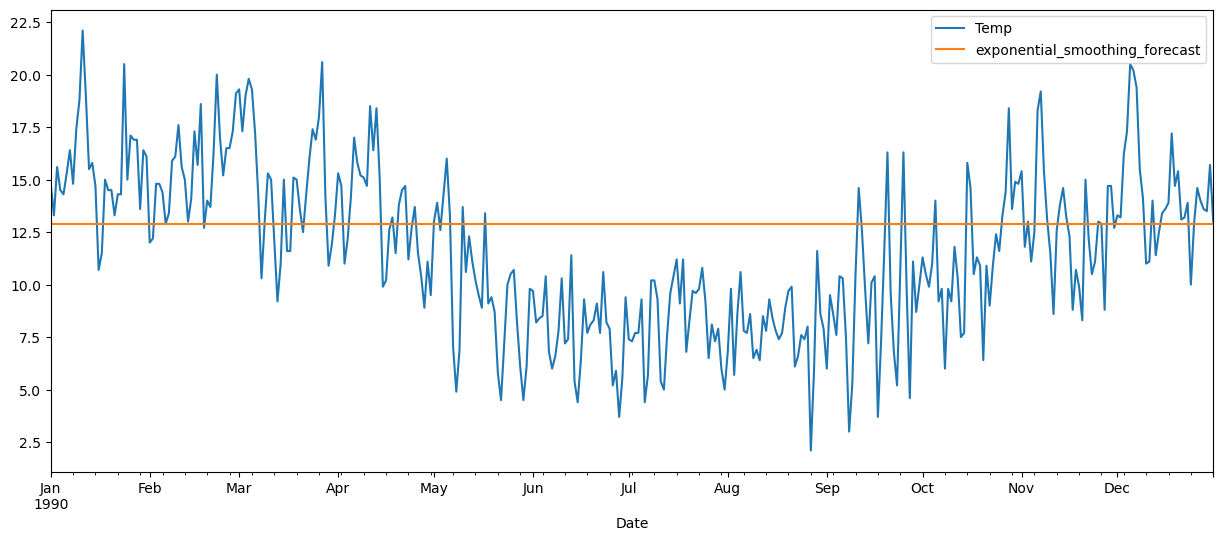

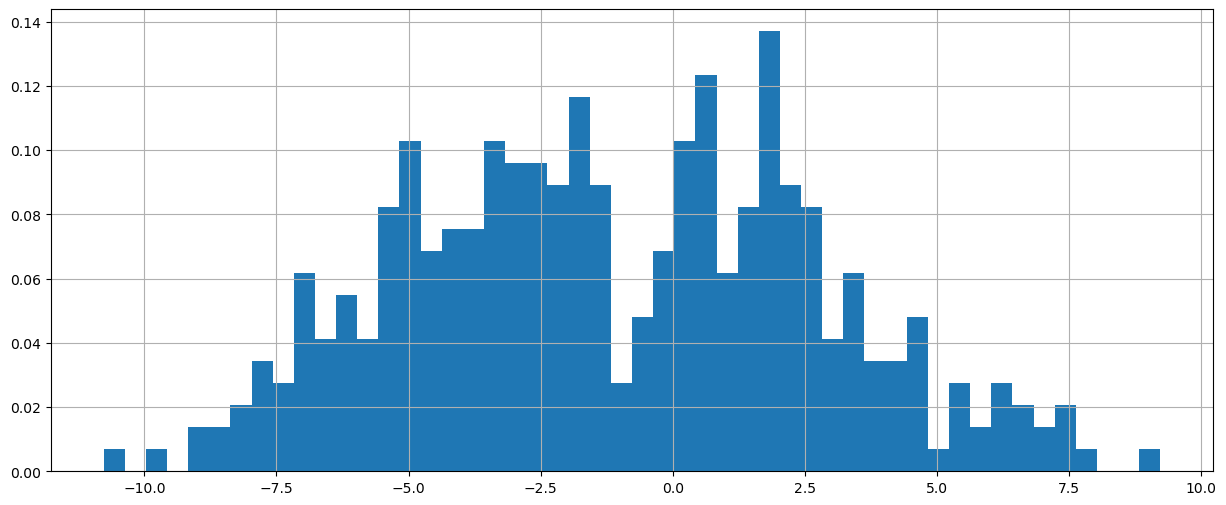

RMSE: 4.040


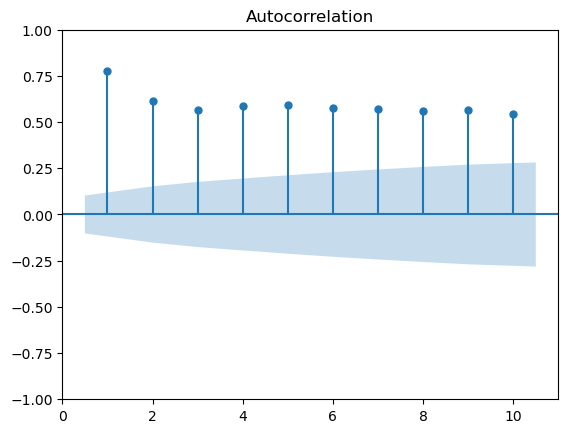

In [66]:
def exponential_smoothing_forecast(df, n_test, alpha):
    # split into train and test
    train, test = df[:-n_test], df[-n_test:]
    # use the last window values to predict the next value 
    predictions = test.copy()
    predictions['exponential_smoothing_forecast'] = train['Temp'][len(train) - 1]
    # calculate the exponential smoothing forecast using pandas 
    predictions['exponential_smoothing_forecast'] = train['Temp'].ewm(alpha=alpha).mean().iloc[-1]
    return predictions

# plot the exponential smoothing forecast and the residuals
predictions = plot_predictions_residuals_acf(exponential_smoothing_forecast, 'exponential_smoothing_forecast', df,
                                                n_test=predSpan, alpha=0.5)


In [ ]:
def exp_smoothing_forecast_with_lagged_feature(df, predSpan, lag, alpha):
    # split into train and test
    train, test = df[:-predSpan], df[-predSpan:]
    # use the realized value from the last lag days to prdict into the future 
    predictions = test.copy()
    

## 4. Holt's Linear Trend Model
The Holt’s linear trend method is an extension of the Simple Exponential Smoothing method that adds support for a trend. The method is suitable for univariate time series with trend and without a seasonal component. The Holt’s linear trend method is a linear model. The model can be extended to support multiple input time steps by adding additional lag.

The parameters of the model are the smoothing parameters, alpha and beta, and the initial level, l0, and initial trend, b0. The smoothing parameters, alpha and beta, control how quickly the influence of the observations at prior time steps decay. The initial level, l0, is an estimate of the level of the series at the beginning of the sample. The initial trend, b0, is an estimate of the trend of the series at the beginning of the sample.
The model can be extended to support:
- multiple input time steps by adding additional lag.
- seasonal component by adding a seasonal parameter and a seasonal equation.
Its equation is given by:
$$l_t = \alpha y_t + (1-\alpha)(l_{t-1} + b_{t-1})$$
$$b_t = \beta (l_t - l_{t-1}) + (1-\beta)b_{t-1}$$
$$\hat{y}_t = l_t + b_t$$
where $l_t$ is the level at time t, $y_t$ is the observation at time t, $\alpha$ is the smoothing parameter, $l_{t-1}$ is the level at time t-1, $b_{t-1}$ is the trend at time t-1, $\beta$ is the smoothing parameter, and $\hat{y}_t$ is the prediction at time t.

### Disadvantages of Holt's Linear Trend Model
1. The model is not able to capture the seasonality in the data.
2. The model is not able to capture the long term dependencies in the data.
3. The predictions are not accurate when the number of test data points is large.



In [67]:
# Holt-Winters Forecast
def holts_linear_forecast(l0, b0, alpha, beta):
    # calculate the holt linear forecast 
    l = l0
    b = b0
    predictions = []
    for i in range(len(df)):
        l = alpha * df['Temp'][i] + (1 - alpha) * (l + b)
        b = beta * (l - l0) + (1 - beta) * b
        l0 = l
        predictions.append(l)
    return predictions

# 5. Holt-Winters Method

## Autoregressive Models 
AR models are a class of statistical models for analyzing and forecasting time series data. An AR model specifies that the output variable depends linearly on its own previous values and on a stochastic term. The stochastic term is a white noise process, which means that it has constant mean and variance, and is uncorrelated with itself at different time lags. The order of an AR model is the number of lagged values of the variable that are included in the model. The order of an AR model is denoted as AR(p), where p is the order of the model. The AR(p) model is defined as:
$$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t$$
where $y_t$ is the observation at time t, $c$ is the constant, $\phi_1$ to $\phi_p$ are the autoregression coefficients, and $\epsilon_t$ is the stochastic term. 

### Estimating AR Model Parameters
The parameters of an AR model can be estimated using the Yule-Walker equations. The Yule-Walker equations are a set of linear equations that can be used to estimate the parameters of an AR model. The Yule-Walker equations are derived from the maximum likelihood estimation of the parameters of an AR model. 

The likelihood function for an AR model is given by:
$$L(\phi_1, \phi_2, ..., \phi_p) = \prod_{t=1}^T \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{1}{2\sigma^2} (y_t - c - \phi_1 y_{t-1} - \phi_2 y_{t-2} - ... - \phi_p y_{t-p})^2 \right)$$
where $y_t$ is the observation at time t, $c$ is the constant, $\phi_1$ to $\phi_p$ are the autoregression coefficients, and $\sigma$ is the standard deviation of the stochastic term. The Gussian appears in the likelihood function because the stochastic term is assumed to be Gaussian. The log-likelihood function for an AR model is given by:
$$\log L(\phi_1, \phi_2, ..., \phi_p) = -\frac{T}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{t=1}^T (y_t - c - \phi_1 y_{t-1} - \phi_2 y_{t-2} - ... - \phi_p y_{t-p})^2$$

The Yule-Walker equations are derived by taking the partial derivatives of the log-likelihood function with respect to the autoregression coefficients and setting the partial derivatives equal to zero.

The Yule-Walker equations are given by:

